In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr
import matplotlib.patches as mpatches

In [29]:
ITD = ['TCGA-AB-2812-03','TCGA-AB-2825-03', 'TCGA-AB-2830-03', 'TCGA-AB-2836-03', 'TCGA-AB-2840-03', 'TCGA-AB-2853-03', 
       'TCGA-AB-2869-03', 'TCGA-AB-2870-03', 'TCGA-AB-2871-03', 'TCGA-AB-2875-03', 'TCGA-AB-2877-03', 'TCGA-AB-2879-03', 
       'TCGA-AB-2880-03', 'TCGA-AB-2895-03', 'TCGA-AB-2906-03', 'TCGA-AB-2909-03', 'TCGA-AB-2913-03', 'TCGA-AB-2915-03', 
       'TCGA-AB-2921-03', 'TCGA-AB-2922-03', 'TCGA-AB-2925-03', 'TCGA-AB-2930-03', 'TCGA-AB-2931-03', 'TCGA-AB-2934-03',
       'TCGA-AB-2942-03', 'TCGA-AB-2965-03', 'TCGA-AB-2970-03', 'TCGA-AB-2976-03', 'TCGA-AB-2980-03', 'TCGA-AB-2986-03', 
       'TCGA-AB-2993-03', 'TCGA-AB-2994-03', 'TCGA-AB-2998-03', 'TCGA-AB-3006-03', 'TCGA-AB-3007-03']

D835Y = ['TCGA-AB-2811-03', 'TCGA-AB-2814-03', 'TCGA-AB-2816-03', 'TCGA-AB-2818-03', 'TCGA-AB-2834-03', 'TCGA-AB-2851-03',
         'TCGA-AB-2900-03', 'TCGA-AB-2910-03', 'TCGA-AB-2924-03', 'TCGA-AB-2926-03', 'TCGA-AB-2945-03', 'TCGA-AB-2947-03',
         'TCGA-AB-2957-03', 'TCGA-AB-2963-03', 'TCGA-AB-2969-03', 'TCGA-AB-2974-03']


In [30]:
Blk = pd.read_table('plots-data (7).txt', index_col= False).iloc[:,::2].rename(columns = {'BLK, mRNA expression (RNA Seq V2 RSEM)':'BLK'})
Fgr = pd.read_table('plots-data (8).txt', index_col= False).iloc[:,::2].rename(columns = {'FGR, mRNA expression (RNA Seq V2 RSEM)':'FGR'})
Fyn = pd.read_table('plots-data (9).txt', index_col= False).iloc[:,::2].rename(columns = {'FYN, mRNA expression (RNA Seq V2 RSEM)':'FYN'})
Hck = pd.read_table('plots-data (10).txt', index_col= False).iloc[:,::2].rename(columns = {'HCK, mRNA expression (RNA Seq V2 RSEM)':'HCK'})
Lck = pd.read_table('plots-data (11).txt', index_col= False).iloc[:,::2].rename(columns = {'LCK, mRNA expression (RNA Seq V2 RSEM)':'LCK'})
Lyn = pd.read_table('plots-data (12).txt', index_col= False).iloc[:,::2].rename(columns = {'LYN, mRNA expression (RNA Seq V2 RSEM)':'LYN'})
Src = pd.read_table('plots-data (13).txt', index_col= False).iloc[:,::2].rename(columns = {'SRC, mRNA expression (RNA Seq V2 RSEM)':'SRC'})
Yes = pd.read_table('plots-data (14).txt', index_col= False).iloc[:,::2].rename(columns = {'YES1, mRNA expression (RNA Seq V2 RSEM)':'YES'})


In [31]:
data = [Blk,Fgr,Fyn,Hck,Lck,Lyn,Src,Yes]

for SFK in data:
    print(SFK.describe())

               BLK
count   163.000000
mean    130.837563
std     191.257674
min       1.453800
25%      30.614100
50%      65.239600
75%     133.871850
max    1546.176800
                FGR
count    163.000000
mean    3327.420380
std     3843.872052
min       19.742500
25%      497.850750
50%     1588.359800
75%     4333.356450
max    14877.069800
               FYN
count   163.000000
mean    933.687168
std     529.989792
min     104.447900
25%     540.958450
50%     873.593100
75%    1235.211500
max    3148.813300
               HCK
count   163.000000
mean   1762.084391
std    1710.231483
min       6.329100
25%     539.215550
50%    1106.474800
75%    2237.780450
max    8949.056600
               LCK
count   163.000000
mean    301.933464
std     328.309482
min      11.386000
25%      86.598050
50%     179.759400
75%     372.336600
max    1943.733300
                LYN
count    163.000000
mean    4125.025650
std     2092.652213
min      579.200000
25%     2826.362200
50%     3667.169

In [32]:
SFKs = pd.DataFrame()
SFKs['Sample Id'] = ''
for SFK in data:
    SFKs = SFKs.merge(SFK, on='Sample Id', how = 'outer')

In [33]:
#Make another column for Flt3 status of each tumor
def Flt3stat(row):
    if row in ITD: return 'ITD'
    if row in D835Y: return 'D835Y'
    else: return 'WT'

SFKs['Flt3 status'] = SFKs['Sample Id'].apply(Flt3stat)

In [34]:
font = {'fontname':'Arial'}

In [35]:
HFcorr, HFpval= pearsonr(SFKs['HCK'], SFKs['FGR'])
HLcorr, HLpval= pearsonr(SFKs['HCK'], SFKs['LYN'])
LFcorr, LFpval= pearsonr(SFKs['LYN'], SFKs['FGR'])

HF = 'Pearson Correlation Coefficient: 0.88 \np-Value: 3.8e-55'
HL = 'Pearson Correlation Coefficient: 0.72 \np-Value: 5.5e-27'
LF = 'Pearson Correlation Coefficient: 0.64 \np-Value: 4.0e-20'


In [36]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='WT':
            cols.append('#8e8f91')
        elif l=='ITD':
            cols.append('#ef2704')
        elif l=='D835Y':
            cols.append('#0709f2')
    return cols

# Create the colors list using the function above
cols=pltcolor(SFKs['Flt3 status'])
SFKs['colors']=pltcolor(SFKs['Flt3 status'])

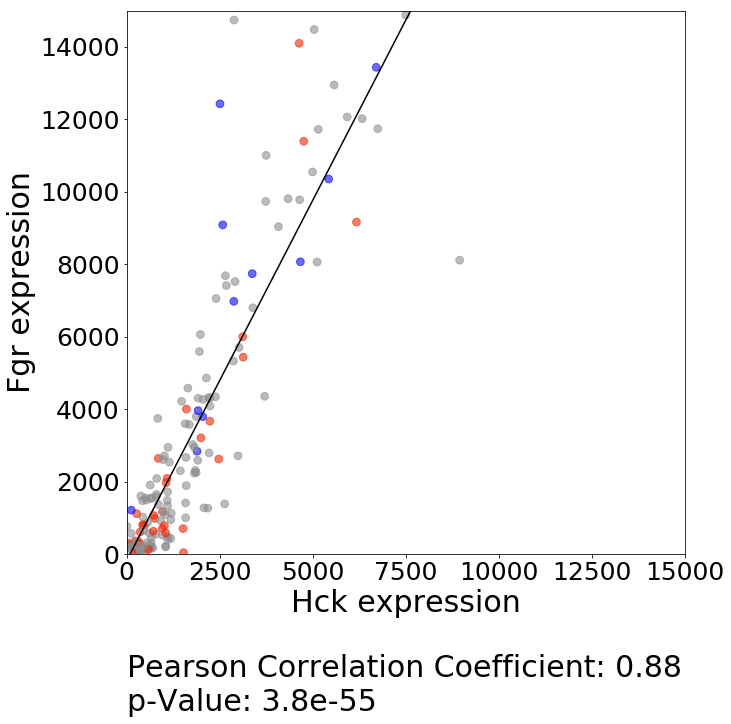

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

sns.axes_style({'font.sans-serif':['Arial']})
ax = plt.scatter(SFKs['HCK'], SFKs['FGR'], c=cols, s=(60,), alpha=0.6)
axes = plt.gca()
axes.set_xlim([0,15000])
axes.set_ylim([0,15000])
plt.plot(np.unique(SFKs['HCK']), np.poly1d(np.polyfit(SFKs['HCK'], SFKs['FGR'], 1))(np.unique(SFKs['HCK'])), color='black')
#axes.spines['top'].set_visible(False)
#axes.spines['right'].set_visible(False)
axes.tick_params(axis='both', which='major', labelsize=25)
plt.annotate(HF, (0,0), (0, -100), textcoords='offset points', va='top').set_fontsize(30)
plt.xlabel('Hck expression').set_fontsize(30)
plt.ylabel('Fgr expression').set_fontsize(30)



plt.show()

In [38]:
fig.savefig("Hck vs. Fgr.pdf", bbox_inches='tight')

fig.savefig("Hck vs Fgr.png", bbox_inches='tight')

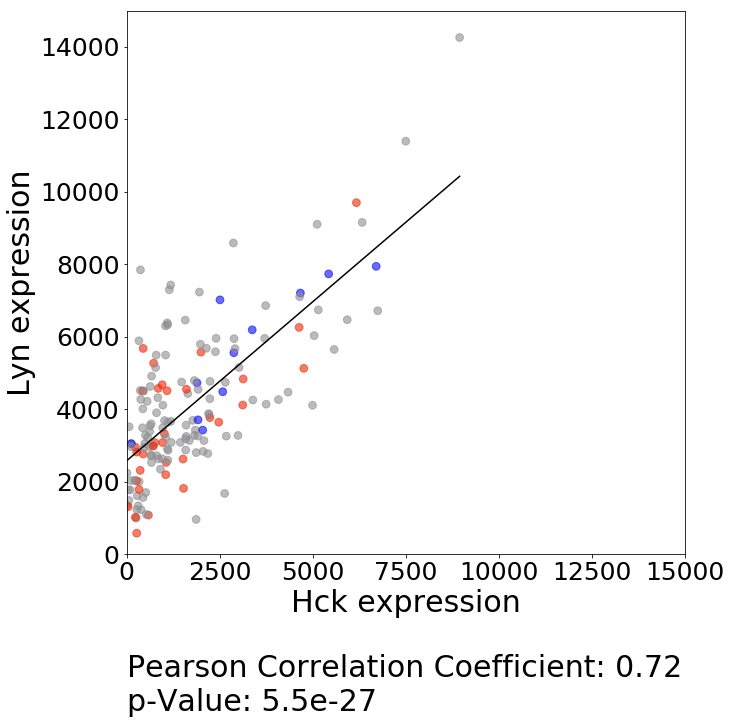

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

sns.axes_style({'font.sans-serif':['Arial']})
ax = plt.scatter(SFKs['HCK'], SFKs['LYN'], c=cols, s=(60,), alpha=0.6)
axes = plt.gca()
axes.set_xlim([0,15000])
axes.set_ylim([0,15000])
plt.plot(np.unique(SFKs['HCK']), np.poly1d(np.polyfit(SFKs['HCK'], SFKs['LYN'], 1))(np.unique(SFKs['HCK'])), color='black')
#axes.spines['top'].set_visible(False)
#axes.spines['right'].set_visible(False)
axes.tick_params(axis='both', which='major', labelsize=25)
plt.annotate(HL, (0,0), (0, -100), textcoords='offset points', va='top').set_fontsize(30)
plt.xlabel('Hck expression').set_fontsize(30)
plt.ylabel('Lyn expression').set_fontsize(30)



plt.show()

In [40]:
fig.savefig("Hck vs. Lyn.pdf", bbox_inches='tight')

fig.savefig("Hck vs Lyn.png", bbox_inches='tight')

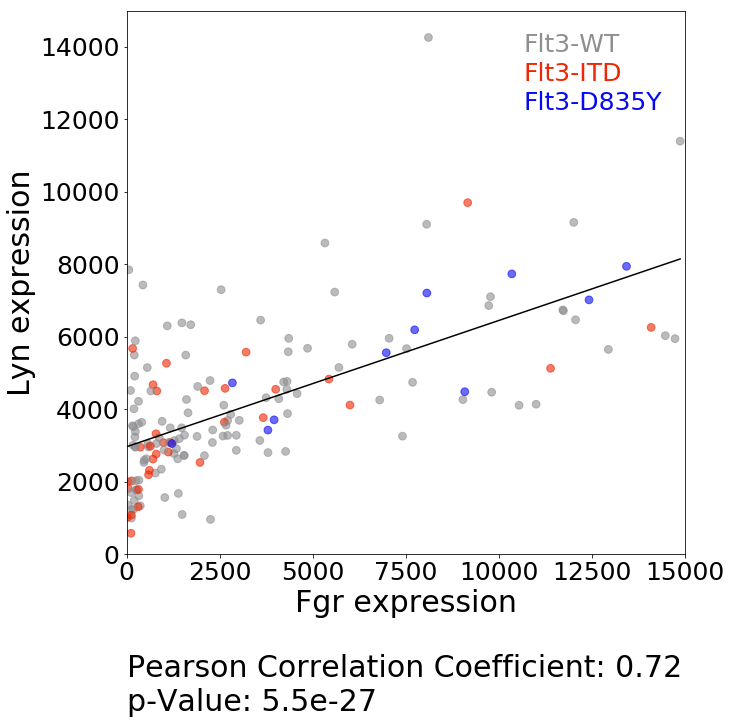

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

sns.axes_style({'font.sans-serif':['Arial']})
ax = plt.scatter(SFKs['FGR'], SFKs['LYN'], c=SFKs['colors'], s=(60,), alpha=0.6)
axes = plt.gca()
axes.set_xlim([0,15000])
axes.set_ylim([0,15000])
plt.plot(np.unique(SFKs['FGR']), np.poly1d(np.polyfit(SFKs['FGR'], SFKs['LYN'], 1))(np.unique(SFKs['FGR'])), color='black')
#axes.spines['top'].set_visible(False)
#axes.spines['right'].set_visible(False)
axes.tick_params(axis='both', which='major', labelsize=25)
plt.annotate(HL, (0,0), (0, -100), textcoords='offset points', va='top').set_fontsize(30)
plt.xlabel('Fgr expression').set_fontsize(30)
plt.ylabel('Lyn expression').set_fontsize(30)

#Create the legend
def create_proxy(label):
    line = mpl.lines.Line2D([0], [0], linestyle='none', mfc='black', mec='none', marker=r'$\mathregular{{{}}}$'.format(label))
    return line
labels = ['Flt3-WT', 'Flt3-ITD', 'Flt3-D835Y']
descriptions = ['Flt3-WT', 'Flt3-ITD', 'Flt3-D835Y']
proxies = [create_proxy(item) for item in labels]
leg = plt.legend(proxies, descriptions, numpoints=1, markerscale=0, fontsize=25, frameon=False, labelspacing=0.2)
for text, color in zip(leg.get_texts(), ['#8e8f91','#ef2704','#0709f2']): text.set_color(color)


plt.show()

In [42]:
fig.savefig("Fgr vs. Lyn.pdf", bbox_inches='tight')

fig.savefig("Fgr vs Lyn.png", bbox_inches='tight')